___
# Atividade: Modelos probabilísticos discretos e Dados
___

## Lucas Chen Alba


## Aula 10

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): Seções 3.2 e 3.3

**Hoje:**
1.	Descrever modelos discretos quanto aos resultados teóricos.
2.	Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.
3.	Contrastar resultados teóricos e empíricos.
4.	Fechamento do conteúdo.

**Próxima aula:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

In [84]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
import math

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
import itertools #importante para gerar todos os resultados possíveis!!
from scipy.stats import poisson


___
## <font color='blue'>Exercício 1</font>

Um resistor de 100K Ohms comprado na Santa Efigênia tem probabilidade de falha de 5%, segundo um fabricante ruim.

Ainda, por suposição, admita que os resistores falhem de forma independente entre si.

Um aluno de engenharia compra um pacote contendo $n$ resistores.

1. Assuma $n=3$ e faça os itens a seguir.
  1. Monte o espaço amostral que combine todos os resultados possíveis de Falha e não Falha desses $n$ resistores. Ainda, calcule a probabilidade de cada resultado do espaço amostral acontecer.
  2. Se $Y$ representa o número de resistores que falham em um pacotinho com $n$ resistores, então construa a distribuição de probabilidades de $Y$.
  3. Calcule a média e o desvio padrão de $Y$. Interprete os resultados.
  4. Utilizando o modelo probabilístico da distribuição Binomial, encontre a distribuição de probabilidades de cada possível valor de $Y$. Calcule também $E(Y)$ e $Var(Y)$. Compare com as distribuições de probabilidades obtidas nos itens anteriores e discuta porque esses valores são iguais ou diferentes!
   
2. Assuma $n=7$ e repita os itens A) a D) anteriores. No caso de $n=7$ ou maiores quantidades de resistores em um pacotinho, qual a viabilidade de construir a distribuição de probabilidades do número de resistores com defeitos quando $n$ não é pequeno seguindo os itens de A) a C)?
    
> 

> **DISTRIBUIÇÃO BINOMIAL - TEORIA:**

> É responsável por modelar uma variável $Y$ definida pelo Número de sucessos em $n$ tentativas, cuja probabilidade de sucesso é dada por $p$. Assim, dizemos que $Y$~$Bin(n,p)$ e lê-se: $Y$ segue uma distribuição binomial com $n$ tentativas e $p$ como probabilidade de sucesso. 

> A função de probabilidade nesse caso é dada por:
$P(Y=y)=\left(
\begin{array}{c}
    n \\
    y
\end{array}\right) p^y (1-p)^{(n-y)}$

> Para um experimento ter as probabilidade dos números de sucessos modeladas por uma distribuição Binomial, o mesmo precisa ter as seguintes propriedades:
* é uma contagem de $n$ repetições (ou tentativas ou ensaios) idênticas;
* cada repetição tem apenas 2 resultados possíveis: um é denominado sucesso e o outro, fracasso;
* a probabilidade de sucesso para cada ensaio é denominada $p$ e será constante em cada repetição. Então, a probabilidade de fracasso $(1-p)$ também não varia de tentativa para tentativa;
* As tentativas são independentes.


> **DISTRIBUIÇÃO BINOMIAL - PYTHON:** <sup> [https://en.wikipedia.org/wiki/SciPy]

> Algumas funções úteis para desenvolver seu código: <sup> [http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.binom.html]
* $P(Y=y)$: `stats.binom.pmf(y, n, p)`
* $P(Y\leq y)$: `stats.binom.cdf(y, n, p)`
* $E(Y)$ e $Var(Y)$: `stats.binom.stats(n, p, moments='mv')`


In [2]:
n = 3

In [3]:
possibilidades = ["S", "F"]

In [4]:
prob = {"S": 0.95, "F":0.05}

In [5]:
arranjos = itertools.product(possibilidades, repeat = n)
espaco_amostral = list(arranjos)
print (espaco_amostral)

[('S', 'S', 'S'), ('S', 'S', 'F'), ('S', 'F', 'S'), ('S', 'F', 'F'), ('F', 'S', 'S'), ('F', 'S', 'F'), ('F', 'F', 'S'), ('F', 'F', 'F')]


In [6]:
prob_linhas = []

for res in espaco_amostral:
    p = 1.0
    for e in res:
        p *= prob[e]
    prob_linhas.append(p)
    print("Probabilidade de ", res, " é igual a ", "%3.5f"%p)

Probabilidade de  ('S', 'S', 'S')  é igual a  0.85737
Probabilidade de  ('S', 'S', 'F')  é igual a  0.04512
Probabilidade de  ('S', 'F', 'S')  é igual a  0.04512
Probabilidade de  ('S', 'F', 'F')  é igual a  0.00238
Probabilidade de  ('F', 'S', 'S')  é igual a  0.04512
Probabilidade de  ('F', 'S', 'F')  é igual a  0.00238
Probabilidade de  ('F', 'F', 'S')  é igual a  0.00238
Probabilidade de  ('F', 'F', 'F')  é igual a  0.00013


In [7]:
valores_Y = {}

In [8]:
for i in range(len(espaco_amostral)):
    y = espaco_amostral[i].count("S")
    # Checar antes se a chave está no dicionário
    if y in valores_Y:
        valores_Y[y] += prob_linhas[i]
    else:
        valores_Y[y] = prob_linhas[i]
        

In [9]:
print("Distribuição de probabilidades da variável aleatória $Y$ - número de vendas")
print('')
for y in valores_Y:
    print("Vendas: ", y, " Probabilidade", "%6.5f "%valores_Y[y])

Distribuição de probabilidades da variável aleatória $Y$ - número de vendas

Vendas:  3  Probabilidade 0.85737 
Vendas:  2  Probabilidade 0.13537 
Vendas:  1  Probabilidade 0.00713 
Vendas:  0  Probabilidade 0.00013 


In [10]:
#media = 0

#for i in prob_linhas:
#    for j in i:
#print (media)

___
## <font color='blue'>Exercício 2</font> 

### <font color='red'>**Publicar no github até dia 21/03 INDIVIDUAL **</font>

Esse exercício irá explorar uma modelagem de dados reais.

> **Confira alguns itens obrigatórios verificados durante a vistoria do Detran**

> *Todos os veículos, novos ou velhos, precisam passar por uma vistoria todos os anos. (...) O motorista precisa estar atento a alguns itens obrigatórios. Tudo deve funcionar perfeitamente, apresentar bom estado de conservação e estar dentro do prazo de validade.*

> <sup>Fonte: http://extra.globo.com/noticias/brasil/transito-seguro/confira-alguns-itens-obrigatorios-verificados-durante-vistoria-do-detran-10190355.html</sup>

Essa matéria lista 14 itens que são inspecionados pelo Detran, dentre os quais têm-se: extintor de incêndio deve estar dentro do prazo de validade; pneus devem estar em bom estado de conservação; buzina deve funcionar perfeitamente; e cintos de segurança para todos os ocupantes do carro. Se, no final das contas, todos os 14 itens estiverem funcionando perfeitamente, o motorista irá feliz para casa assegurado de que seu carro está sem problemas com a vistoria.

1. A base de dados `Carros.txt` apresenta, para cada um dos três mil carros de passeio vistoriados, duas informações: tipo de carro (1: Popular e 2: Não Popular) e quantidade de itens vistoriados em não conformidade (que pode variar de 0 a 14). 
    1. Considerando todos os carros, analise a quantidade de itens vistoriados em não conformidade. Pela tabela de frequências relativas, calcule a média e variância dessa quantidade. Interprete-os.
    2. Assuma que a variável *Quantidade de itens em não conformidade* possa ser ajustada pelo modelo Binomial com parâmetros $n=14$ e $p=0,10$. Interprete esses parâmetros para o problema em questão e, ainda, discuta se as propriedades da distribuição Binomial estão satisfeitas para o problema aqui me questão.
    
    **Independente da sua resposta anterior, considere que a distribuição binomial seja adequada para modelar a variável de interesse nos próximos itens!**
    3. Utilizando o método `stats.binom.pmf`, obtenha a probabilidade de cada uma das quantidades de itens em não conformidade quando $n=14$ e $p=0,10$. Calcule o valor esperado e a variância da quantidade de itens em não conformidade utilizando o método `stats.binom.stats` e via resultado da Tabela 4.4 do Magalhães e Lima (pág. 125).
    4. Compare as probabilidades teóricas com as frequências relativas observadas nos dados. Para isso, tem-se, por exemplo, as duas opções abaixo para comparar se os resultados empíricos se encaixam com o modelo teórico proposto. 
        - A primeira opção gráfica contrasta a frequência relativa e a probabilidade teórica para uma determinada quantidade de itens em não conformidade! Vide Figura 3.4 do livro Magalhães e Lima (pág. 87). Ou seja, essa opção contrasta a frequência relativa em um valor de $y$ e a probabilidade pontual $P(Y=y)$.
        - A segunda contrasta a frequência relativa acumulada com a probabilidade acumulada até determinada quantidade de itens em não conformidade. Ou seja, compara a frequência relativa acumulada até $y$ com a probabilidade acumulada $P(Y\leq y)$.
    Construa os gráficos de acordo com as duas opções e refine sua conclusão quanto ao uso do modelo teórico para ajustar a variável em questão!
    5. Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?
    6. Considerando apenas os carros populares, o modelo Binomial com parâmetros $n=14$ e $p=0,10$ é adequado para ajustar a variável Quantidade de itens em não conformidade? Se sim, justifique; caso não, sugira novos valores para os parâmetros da distribuição ajuste aos dados.

In [11]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())
carros = pd.read_table('Carros.txt', sep=' ')

Esperamos trabalhar no diretório
C:\Users\chend\Documents\GitHub\CDAgoraVai\aula10


In [12]:
carros.head()

,Tipo,Quantidade
1,1,0
2,1,2
3,1,2
4,1,3
5,1,1


### A

In [13]:
itens = carros.iloc[:,-1]

In [14]:
media = 0
for i in itens:
    media += i
media = media/len(itens)
print ('média:', media)

média: 1.37133333333


In [15]:
var = 0
for i in itens:
    var += (i - media)**2
print ('variância:', var)
print ('A medida variância nos da um valor muito alto, pois eleva todas as diferenças ao quadrado')

variância: 4738.33466667
A medida variância nos da um valor muito alto, pois eleva todas as diferenças ao quadrado


### B

O modelo binomial poderia ser aplicado neste caso se considerarmos os 14 itens em conformidade um sucesso e um carro com itens em conformidade < 14 uma falha ou vice versa. Caso contrário o modelo não poderia ser aplicado, pois a váriável Quantidade de itens em não conformidade é uma variável quantitativa. Supondo a condição acima, o n representa a quantidade de vezes que a amostra foi analisada, e dentro dessas 14 vezes, 10% do carros tiveram um sucesso (neste caso 10% dos carros tem os itens em conformidade < 14)

### C

In [16]:
stats.binom.pmf (1, 14, 0.1)

0.35586121596606141

In [48]:
listaprobacum = []
listaprob = []
prob = 0
probacum = 0
for i in range (15):
    prob = stats.binom.pmf (i, 14, 0.1, loc = 0)
    probacum += prob
    listaprob.append (prob)
    listaprobacum.append (probacum)
    print ('Probabilidade de ter', i, 'itens em conformidade é de:', prob)

Probabilidade de ter 0 itens em conformidade é de: 0.22876792455
Probabilidade de ter 1 itens em conformidade é de: 0.355861215966
Probabilidade de ter 2 itens em conformidade é de: 0.257010878198
Probabilidade de ter 3 itens em conformidade é de: 0.114227056977
Probabilidade de ter 4 itens em conformidade é de: 0.034902711854
Probabilidade de ter 5 itens em conformidade é de: 0.00775615818978
Probabilidade de ter 6 itens em conformidade é de: 0.00129269303163
Probabilidade de ter 7 itens em conformidade é de: 0.00016415149608
Probabilidade de ter 8 itens em conformidade é de: 1.595917323e-05
Probabilidade de ter 9 itens em conformidade é de: 1.18216098e-06
Probabilidade de ter 10 itens em conformidade é de: 6.567561e-08
Probabilidade de ter 11 itens em conformidade é de: 2.65356e-09
Probabilidade de ter 12 itens em conformidade é de: 7.371e-11
Probabilidade de ter 13 itens em conformidade é de: 1.26e-12
Probabilidade de ter 14 itens em conformidade é de: 1e-14


In [40]:
print ('Esperança de Y:', stats.binom.stats (14, 0.1, loc = 0,  moments = 'm'))
print ('Variância de Y:', stats.binom.stats (14, 0.1, loc = 0,  moments = 'v'))

Esperança de Y: 1.4000000000000001
Variância de Y: 1.2600000000000002


### D

In [41]:
vc = itens.value_counts() [:14]
print (vc)

1    950
0    864
2    664
3    325
4    139
5     47
6      8
7      2
8      1
Name: Quantidade, dtype: int64


In [42]:
probacum2 = 0
listarealacum = []
listareal = []
for i in range (8):
    probacum2 += vc[i]
    probacum3 = probacum2/3000
    listareal.append (vc[i]/3000)
    listarealacum.append(probacum3)

Representei os gráficos em linha para melhor vizualização, o correto estatisticamente seriam pontos, pois a variável itens não é contínua nos reais

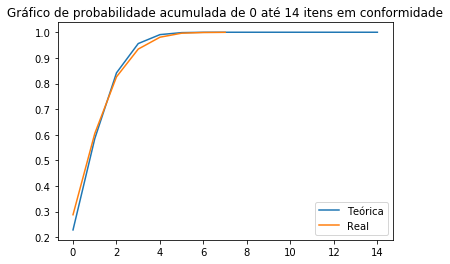

In [49]:
plt.plot (listaprobacum, label = 'Teórica')
plt.plot (listarealacum, label = 'Real')

plt.legend (loc = 'best')
plt.title ('Gráfico de probabilidade acumulada de 0 até 14 itens em conformidade')

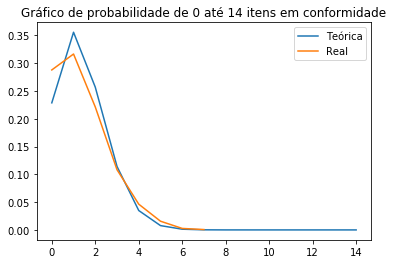

In [33]:
plt.plot (listaprob, label = 'Teórica')
plt.plot (listareal, label = 'Real')

plt.legend (loc = 'best')
plt.title ('Gráfico de probabilidade de 0 até 14 itens em conformidade')

Como podemos perceber pelos gráficos acima, a teoria de que cada item em não conformidade tem uma probabilidade de 10%, é confirmada, com uma certa margem de erro, a partir da amostra dada em Carros.txt. Percebemos também que depois de 8 itens em conformidade, a quantidade de carros que atingem essa meta é praticamente nula.

### E

Com um modelo probabilístco podemos por exemplo, como o nome já diz, realizar previsões e tomadas de decisão baseadas em probabilidades. Nem sempre teremos um banco de dados para analisar, nesses casos é quando podemos utilizar um modelo probabilístico para representar a realidade, assim como os modelos científicos, por exemplo o modelo de um átomo.

### F

A aproximação de 10% para cada item em não conformidade me parece a mais razoável, testei valores de 9% e 11% mas 10% foi a que mais se aproximou da reta real

___
## <font color='blue'>Exercício 3</font>

### <font color='red'>**Publicar no github até dia 21/03 INDIVIDUAL **</font>

Esse exercício irá explorar modelos de distribuição de Poisson.

Uma fábrica produz determinado veículo. O gerente de vendas fechou um negócio que implica na produção de pelo menos 110 unidades nos próximos dois meses. Para isso, será construída uma nova linha de montagem com capacidade para produzir em média 50 veículos por mês (considere meses de 30 dias). A linha funcionará ininterruptamente. Além disso, apenas um veículo é produzido por vez. Considere que um modelo Poisson seja adequado para a quantidade de veículos produzidos.
   1. Qual a probabilidade  da produção ser igual a 100 veículos nos próximos dois meses?
   2. Qual a probabilidade  da produção ser de pelo menos 100 veículos nos próximos dois meses?
   3. Qual a probabilidade da produção ser entre 100 e 110 veículos nos próximos dois meses?
   4. Se forem produzidos de pelo menos 100 veículos no próximo mês, qual a probabilidade do gerente cumprir a meta negociada?
   5. Caso o prazo seja cumprido, o lucro será da ordem de $250$ mil, caso não seja, o lucro cai para $200$ mil. Qual é o lucro esperado e seu desvio-padrão?

**Observação:** Explore os comandos de `stats.poisson`. <sup>[http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html]


### 1

In [97]:
p100 = ((math.exp(-100))*(100**100))/(math.factorial(100))
print ('Probabilidade da produção ser 100 veículos é de:', p100*100, '%')

Probabilidade da produção ser 100 veículos é de: 3.9860996809147133 %


In [98]:
p100 = ((math.exp(-2))*(100**2))/(math.factorial(100))
print (p100)

1.4501314833440456e-155


In [99]:
print ('Probabilidade da produção ser 100 veículos é de:', (poisson.pmf(100, 100, loc=0))*100, '%')

Probabilidade da produção ser 100 veículos é de: 3.98609968091 %


### 2

In [100]:
p_acum = 0
for i in range(100):
    p = ((math.exp(-100))*(100**i))/(math.factorial(i))
    p_acum += p
p_acum = p_acum*100
print ('Probabilidade acumulada até o 100:', p_acum, '%')
print ('Probabilidade de produzirem mais de 100 veículos:', 100 - p_acum)

Probabilidade acumulada até o 100: 48.67012017208513 %
Probabilidade de produzirem mais de 100 veículos: 51.32987982791487


In [101]:
poisson.cdf(100, 100, loc=0)

0.52656219852999864

### 3

In [102]:
p100_110 = poisson.cdf(110, 100, loc=0) - poisson.cdf(100, 100, loc=0)
print ('Probabilidade da produção de veículos estar entre 100 e 110:', p100_110 * 100, '%')

Probabilidade da produção de veículos estar entre 100 e 110: 32.6300453028 %


### 4

In [105]:
p110_10 = poisson.cdf(110, 100, loc=0) - poisson.cdf(10, 100, loc=0)
print ('Probabilidade do gerente cumprir a meta (110), dado que ja foram produzidos 100, então ee precisa produzir pelo menos 10 no segundo mês, é de:', p110_10*100, '%')

Probabilidade do gerente cumprir a meta (110), dado que ja foram produzidos 100, então ee precisa produzir pelo menos 10 no segundo mês, é de: 85.2862651558 %


### 5